<a href="https://colab.research.google.com/github/Psubrat98/ML-Projects-With-Python/blob/main/Netwok_attack_type/Netwok_attack_type_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries...

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Loadiing the Dataset from Lab files...

In [4]:
data_set = pd.read_csv('/content/UNR-IDD.csv')

Suffling the dataset...

In [5]:
data_set = data_set.sample(frac=1).reset_index(drop=True)

In [6]:
print(data_set)

                 Switch ID Port Number  Received Packets  Received Bytes  \
0      of:0000000000000006     Port#:2               127           16674   
1      of:0000000000000008     Port#:1              1401          189318   
2      of:0000000000000007     Port#:2               945        25239432   
3      of:0000000000000003     Port#:1               125            8723   
4      of:0000000000000007     Port#:1               144           19522   
...                    ...         ...               ...             ...   
37406  of:0000000000000002     Port#:1               926        25229606   
37407  of:0000000000000003     Port#:3              2626        19136918   
37408  of:000000000000000a     Port#:1               864        12642244   
37409  of:0000000000000001     Port#:4               652        18928771   
37410  of:0000000000000003     Port#:1              3010        75675177   

       Sent Bytes  Sent Packets  Port alive Duration (S)  Packets Rx Dropped  \
0      

Merging required Label and Binary label columns of Dataset to get desire lable column...

In [7]:
data_set['Actual Label'] = data_set['Label']+' '+data_set['Binary Label']

Setiing required out put test values of Actual label column with numerical values...

In [8]:
data_set.loc[data_set['Actual Label'] == 'TCP-SYN Attack', 'Actual Label',] = 0
data_set.loc[data_set['Actual Label'] == 'Blackhole Attack', 'Actual Label',] = 1
data_set.loc[data_set['Actual Label'] == 'Diversion Attack', 'Actual Label',] = 2
data_set.loc[data_set['Actual Label'] == 'Overflow Attack', 'Actual Label',] = 3
data_set.loc[data_set['Actual Label'] == 'Normal Normal', 'Actual Label',] = 4
data_set.loc[data_set['Actual Label'] == 'PortScan Attack', 'Actual Label',] = 5

In [9]:
data_set.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label,Actual Label
0,of:0000000000000006,Port#:2,127,16674,6417048,2097,131,0,0,0,...,480,True,0,6,2672,2558,-1,TCP-SYN,Attack,0
1,of:0000000000000008,Port#:1,1401,189318,6512839,1867,2072,0,0,0,...,0,True,0,505,7872,7736,-1,Blackhole,Attack,1
2,of:0000000000000007,Port#:2,945,25239432,6343725,635,146,0,0,0,...,702,True,0,5,1814,1698,-1,TCP-SYN,Attack,0
3,of:0000000000000003,Port#:1,125,8723,6318419,288,116,0,0,0,...,0,True,0,6,937,849,-1,PortScan,Attack,5
4,of:0000000000000007,Port#:1,144,19522,19606,146,166,0,0,0,...,0,True,0,8,7246,7134,-1,TCP-SYN,Attack,0


Loading dataset in X & Y by droping method...

In [10]:
X = data_set.drop(['Switch ID','Port Number','is_valid','Label','Binary Label', 'Actual Label'], axis =1)
Y = data_set['Actual Label']

Removing the unwanted features from datset by using variance_thresold method...

In [11]:
var_th = VarianceThreshold(threshold = 0)
var_th.fit(X)

VarianceThreshold(threshold=0)

In [12]:
var_th.get_support()

array([ True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False])

In [13]:
X.columns[var_th.get_support()]

Index(['Received Packets', 'Received Bytes', 'Sent Bytes', 'Sent Packets',
       'Port alive Duration (S)', 'Delta Received Packets',
       'Delta Received Bytes', 'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)', 'Connection Point', 'Total Load/Rate',
       'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
       'Latest bytes counter', 'Active Flow Entries', 'Packets Looked Up',
       'Packets Matched'],
      dtype='object')

In [14]:
const_columns = [column for column in X.columns
                 if column not in X.columns[var_th.get_support()]]
print(len(const_columns))

10


In [15]:
for features in const_columns:
  print(features)

Packets Rx Dropped
Packets Tx Dropped
Packets Rx Errors
Packets Tx Errors
Delta Packets Rx Dropped
 Delta Packets Tx Dropped
Delta Packets Rx Errors
Delta Packets Tx Errors
Table ID
Max Size


In [16]:
X.drop(const_columns, axis = 1)

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
0,127,16674,6417048,2097,131,6,829,5893,100,5,2,480,96282,480,96282,480,6,2672,2558
1,1401,189318,6512839,1867,2072,4,556,4998,71,4,1,0,0,0,0,0,505,7872,7736
2,945,25239432,6343725,635,146,4,556,556,4,4,2,702,7021,702,7021,702,5,1814,1698
3,125,8723,6318419,288,116,0,0,598,5,4,1,0,0,0,0,0,6,937,849
4,144,19522,19606,146,166,4,556,556,4,4,1,0,0,0,0,0,8,7246,7134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37406,926,25229606,12665757,1001,266,0,0,278,2,5,1,0,0,0,0,0,6,135423,135360
37407,2626,19136918,25410215,2357,1786,4,556,556,4,5,3,0,0,0,0,0,6,11272,11152
37408,864,12642244,38956322,245484,985,62,4088,3415074,104,4,1,288895,12606923,288895,12606923,288895,8,644344,644225
37409,652,18928771,27015,260,161,2,278,278,2,5,4,0,0,0,0,0,6,1866,1772


setting Y values as integer...

In [17]:
Y = Y.astype('int')

In [18]:
print(X)


       Received Packets  Received Bytes  Sent Bytes  Sent Packets  \
0                   127           16674     6417048          2097   
1                  1401          189318     6512839          1867   
2                   945        25239432     6343725           635   
3                   125            8723     6318419           288   
4                   144           19522       19606           146   
...                 ...             ...         ...           ...   
37406               926        25229606    12665757          1001   
37407              2626        19136918    25410215          2357   
37408               864        12642244    38956322        245484   
37409               652        18928771       27015           260   
37410              3010        75675177    50748263          4399   

       Port alive Duration (S)  Packets Rx Dropped  Packets Tx Dropped  \
0                          131                   0                   0   
1                      

In [19]:
print(Y)

0        0
1        1
2        0
3        5
4        0
        ..
37406    5
37407    1
37408    4
37409    5
37410    1
Name: Actual Label, Length: 37411, dtype: int64


Loding dataset into X_train,X_test, Y_train, Y_test...

In [20]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2, random_state=15000) 

In [21]:
X_train.shape,X_test.shape, Y_train.shape, Y_test.shape

((29928, 29), (7483, 29), (29928,), (7483,))

In [22]:
print(X_train)

       Received Packets  Received Bytes  Sent Bytes  Sent Packets  \
10474              1912          260416   120131487          6756   
34021              2132        56770122    31814430          3551   
32247              3192        44338180    74525533          4202   
18169              4107        63269775    63271234          4154   
30474               681        12648091       38795           291   
...                 ...             ...         ...           ...   
2536                791        12651798       37770           339   
19476              1154        12701974     6467428           784   
6424                399         6319013    12634581           607   
19668               573        12600098       15357           114   
19743               110           14995       14785           105   

       Port alive Duration (S)  Packets Rx Dropped  Packets Tx Dropped  \
10474                     2836                   0                   0   
34021                  

Loading DecisionTreeClassifier model and fitting training dataset to the model...
Here we use DecisionTreeClassifier because we have to predict multi classes...

In [23]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)  

DecisionTreeClassifier()

Predicting Y label with traing data...

In [24]:
prediction_on_training_data = classifier.predict(X_train)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

Cheking training data accuracy...

In [25]:
print(accuracy_on_training_data)

1.0


Predicting Y label with test data...

In [26]:
Y_pred = classifier.predict(X_test)

Checking test data accuracy...

In [27]:
accuracy_on_test_data = accuracy_score(Y_test, Y_pred)

In [28]:
print(accuracy_on_test_data)

0.9172791661098489


In [29]:
print(Y_test)

18533    5
34428    5
8183     0
4124     1
14224    2
        ..
34931    2
32271    0
4533     4
28840    4
18280    1
Name: Actual Label, Length: 7483, dtype: int64


In [30]:
print(Y_pred)

[5 5 0 ... 4 4 1]


print unique vaues in Y_test...

In [31]:
Y_test.unique()

array([5, 0, 1, 2, 4, 3])

Checking prediction value with actual value of test data value...

In [32]:
index = int(input())
print(Y_pred[index])
print(Y_test.iloc[[index]])

6
4
12232    4
Name: Actual Label, dtype: int64


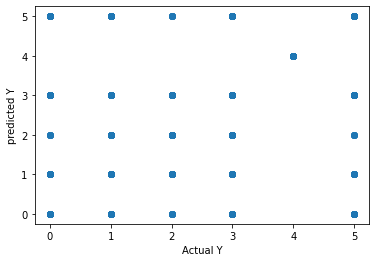

In [33]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual Y')
plt.ylabel('predicted Y')
plt.show()

Confusion matrix for X_test, Y_test...

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


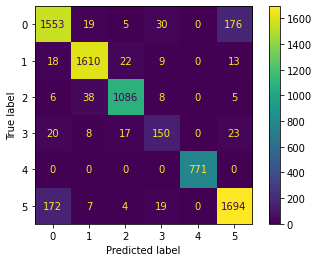

In [34]:
plot_confusion_matrix(classifier,X_test,Y_test)
plt.show()

Here index is index value of X_test...

In [35]:
index = int(input())
pred_value = Y_pred[index]
if pred_value == 0:
  print('attack type:'+'TCP-SYN Attack')
elif pred_value == 1:
  print('attack type:'+'Blackhole Attack')
elif pred_value == 2:
  print('attack type:'+'Diversion Attack')
elif pred_value == 3:
  print('attack type:'+'Overflow Attack')
elif pred_value == 5:
  print('attack type:'+'portscan Attack')
else:
  print('attack type:'+'Normal')

55
attack type:TCP-SYN Attack
